# 2차 과제

## 16조
2019112127 박세호, 2020112167 민장규, 2020112089 최지안

## 데이터 소개
사용한 dataset : https://www.kaggle.com/datasets/kukuroo3/used-car-price-dataset-competition-format

### Feature 소개
- carID : 고유 ID
- brand : 회사 브랜드
- model : 모델명
- year : 출시년도
- transmission : 변속기
- mileage : 주행거리
- fuelType : 연료 유형
- tax : 세금
- mpg : Miles Per Gallon
- engineSize : 엔진 배기량
- price : 가격

## 개요

### 데이터 전처리

- 중복값 처리
- 결측치 처리
- 범주형 변수 원핫 인코딩

### Linear Regression without sklearn

### Linear Regression with sklearn

### Polynomial Regression

### Modeling nonlinear relationships in the Car Price Dataset

### Model Complexity and Overfitting

### Using regularized methods for regression
- Ridge
- Lasso

# Preprocessing

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

import seaborn as sns


In [330]:
data = pd.read_csv('used_car_price_dataset.csv')

In [331]:
data.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145,47.1,1.0,16990


In [332]:
data.describe()

,carID,year,mileage,tax,mpg,engineSize,price
count,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,15832.446169,2016.737903,24956.286895,152.332661,50.370766,2.124375,23469.943750
std,2206.717006,2.884035,24443.333662,82.403844,35.746505,0.789368,16406.714563
min,12002.000000,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,13929.250000,2016.000000,5641.250000,145.000000,38.700000,1.600000,12000.000000
50%,15840.000000,2017.000000,19000.000000,145.000000,47.100000,2.000000,18999.000000
75%,17765.750000,2019.000000,36702.000000,150.000000,54.300000,2.800000,30335.750000
max,19629.000000,2020.000000,259000.000000,580.000000,470.800000,6.600000,145000.000000


## 중복값 처리

In [333]:
print("중복된 data 개수 :", len(data[data.duplicated()]))

중복된 data 개수 : 0


## 결측치 처리

In [334]:
data.isnull().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

## 이상치 처리

In [335]:
def treatment_outlier(col, data) :
    # IQR 계산
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 제거
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]
    return data

In [336]:
#carID는 index로 지정
data = data.set_index('carID')

In [337]:
col_preprocessing = ['mileage', 'mpg', 'engineSize']
for col in col_preprocessing :
    data = treatment_outlier(col, data)

## 범주형 변수 이진화

In [338]:
categorical_features = ['brand', 'model', 'transmission','fuelType']

for col in categorical_features:
    print(data[col].value_counts())
    print()

brand
vw          743
merc        740
ford        715
bmw         587
hyundi      499
skoda       416
toyota      322
audi        318
vauxhall    269
Name: count, dtype: int64

model
 Arteon         167
 Grand C-MAX    162
 Scirocco       159
 Santa Fe       146
 CLS Class      142
               ... 
 Z3               5
 R8               4
 Getz             3
 Eos              3
 IQ               2
Name: count, Length: 87, dtype: int64

transmission
Manual       1861
Automatic    1432
Semi-Auto    1315
Other           1
Name: count, dtype: int64

fuelType
Diesel    2886
Petrol    1649
Hybrid      60
Other       14
Name: count, dtype: int64



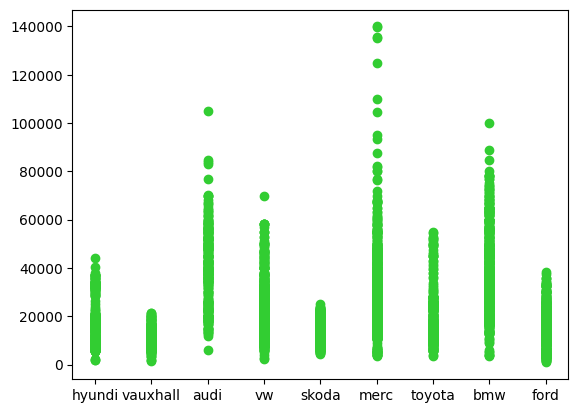

In [339]:
plt.scatter(data['brand'], data['price'], color='limegreen')
plt.show()

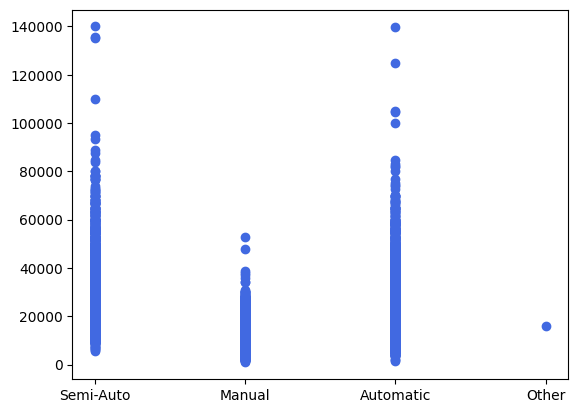

In [340]:
plt.scatter(data['transmission'], data['price'], color='royalblue')
plt.show()

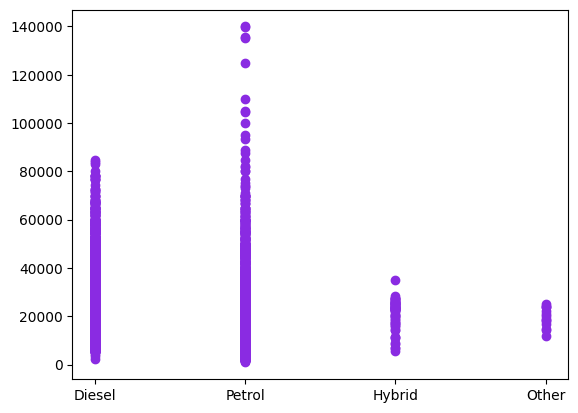

In [341]:
plt.scatter(data['fuelType'], data['price'], color='blueviolet')
plt.show()

In [342]:
# 모델명을 제외한 범주형 변수에 대해 원핫 인코딩 진행
categorical_features = ['brand', 'transmission', 'fuelType']

for col in categorical_features:
    data = pd.concat([data, pd.get_dummies(data[col])], axis=1)

data.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,...,vauxhall,vw,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,Other,Petrol
carID,,,,,,,,,,,,,,,,,,,,,
13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145,39.8,2.2,31995,...,False,False,False,False,False,True,True,False,False,False
17314,vauxhall,GTC,2015,Manual,47870,Diesel,125,60.1,2.0,7700,...,True,False,False,True,False,False,True,False,False,False
12342,audi,RS4,2019,Automatic,5151,Petrol,145,29.1,2.9,58990,...,False,False,True,False,False,False,False,False,False,True
13426,vw,Scirocco,2016,Automatic,20423,Diesel,30,57.6,2.0,12999,...,False,True,True,False,False,False,True,False,False,False
16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145,47.1,1.0,16990,...,False,False,False,False,False,True,False,False,False,True


In [343]:
#categorical feature 삭제
categorical_features = ['brand', 'model','transmission', 'fuelType']

data.drop(categorical_features, axis=1, inplace = True)

<Axes: >

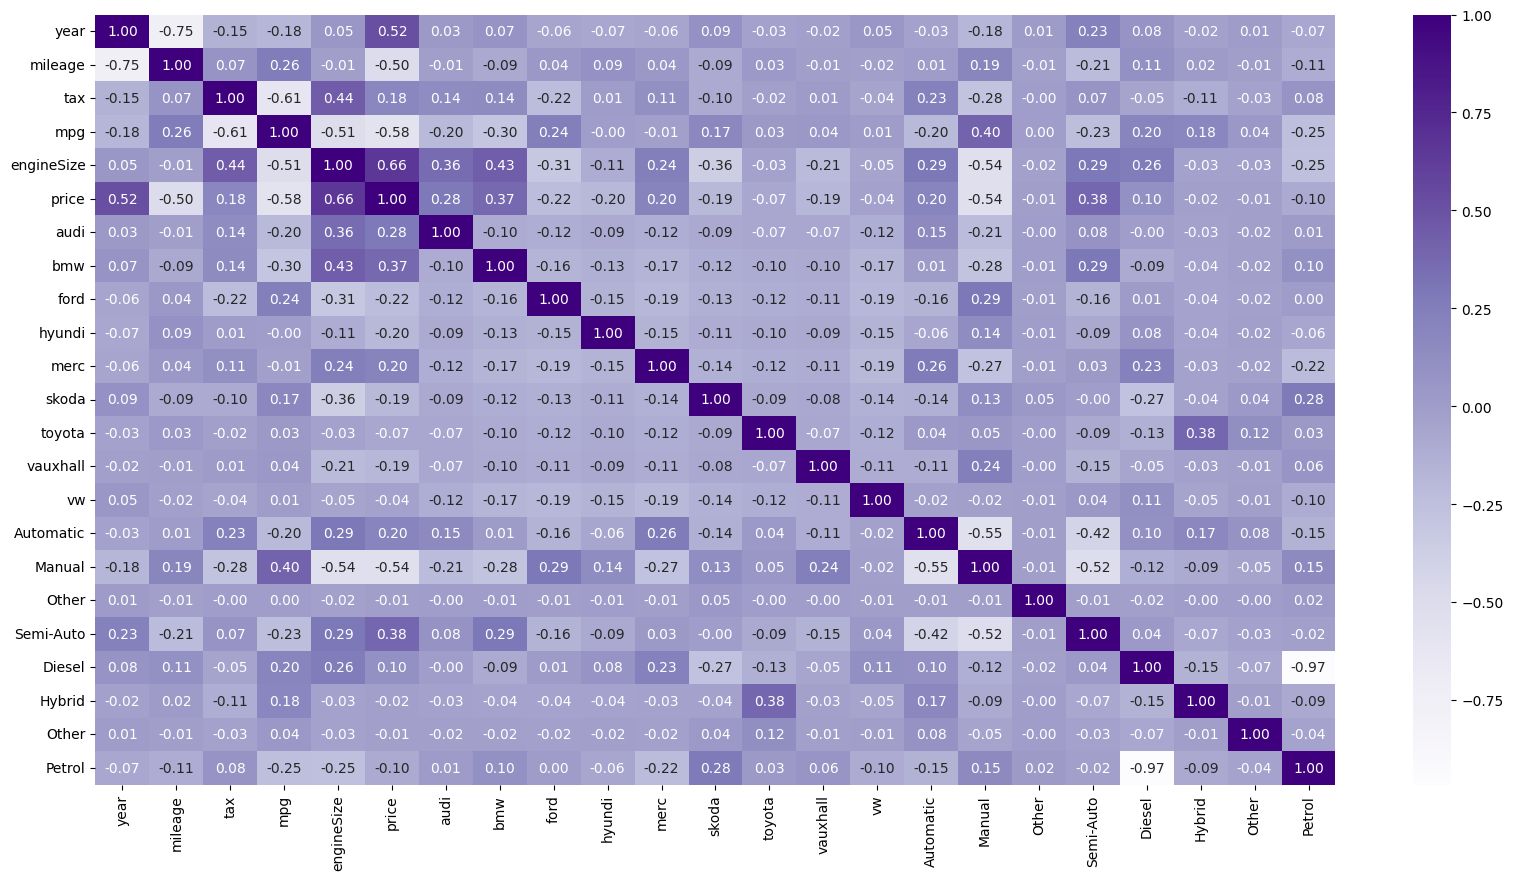

In [344]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt=".2f" ,cmap='Purples')

In [345]:
# price와 상관관계가 높은 변수 분석
p_corr = corr.loc['price']
p_corr = p_corr[abs(p_corr)>0.4].sort_values(ascending=False)
print(p_corr)

price         1.000000
engineSize    0.657266
year          0.519440
mileage      -0.499875
Manual       -0.536126
mpg          -0.576201
Name: price, dtype: float64


# Linear Regression

## Linear Regression without sklearn

## Linear Regression with sklearn

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [347]:
X= data.drop(["price"],axis =1)
y= data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
print(f'train data 개수 : {len(X_train)}, test data 개수 :{len(X_test)} ')

train data 개수 : 3687, test data 개수 :922 


In [348]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [349]:
model.coef_

array([ 1.47733336e+03, -1.51934676e-01, -4.13152528e+01, -5.47569611e+02,
        8.45308841e+03,  5.15962100e+03,  4.00202853e+03, -4.61113166e+02,
       -4.46416517e+03,  5.18277004e+03, -1.34180271e+03, -2.86879943e+03,
       -4.10235306e+03, -1.10618603e+03, -1.59467952e+02, -3.12444204e+02,
       -9.90308328e+02,  1.46222048e+03, -2.75515297e+03,  5.61078133e+03,
        1.68372397e+03, -4.53935234e+03])

In [350]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [351]:
mean_squared_error(y_train_pred , y_train) , mean_squared_error(y_test_pred , y_test)

(50076100.37383896, 45682404.7414576)

In [352]:
print('train R^2: ',r2_score(y_train_pred , y_train) , ', test R^2: ',r2_score(y_test_pred , y_test))

train R^2:  0.7384235772403165 , test R^2:  0.7587103820312919


In [353]:
print("Train Adjusted R^2:",1 - (1-r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("Test Adjusted R^2:",1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Train Adjusted R^2: 0.7914141237867035
Test Adjusted R^2: 0.7947549162250416


## Plot Linear Regression

In [354]:
def plot_regression(xval) :
    X = data[[xval]].values
    y = data['price'].values

    regr = LinearRegression()

    quadratic = PolynomialFeatures(degree=2)
    cubic = PolynomialFeatures(degree=3)
    X_quad = quadratic.fit_transform(X)
    X_cubic = cubic.fit_transform(X)

    X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

    regr = regr.fit(X, y)
    y_lin_fit = regr.predict(X_fit)
    linear_r2 = r2_score(y, regr.predict(X))

    regr = regr.fit(X_quad, y)
    y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
    quadratic_r2 = r2_score(y, regr.predict(X_quad))

    regr = regr.fit(X_cubic, y)
    y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
    cubic_r2 = r2_score(y, regr.predict(X_cubic))

    plt.scatter(X, y, label='training points', color='lightgray')

    plt.plot(X_fit, y_lin_fit, 
            label='linear (d=1), $R^2=%.2f$' % linear_r2, 
            color='blue', 
            lw=2, 
            linestyle=':')

    plt.plot(X_fit, y_quad_fit, 
            label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
            color='red', 
            lw=2,
            linestyle='-')

    plt.plot(X_fit, y_cubic_fit, 
            label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
            color='green', 
            lw=2, 
            linestyle='--')

    plt.xlabel(col)
    plt.ylabel('Car Price ($)')
    plt.legend(loc='upper right')

    plt.show()

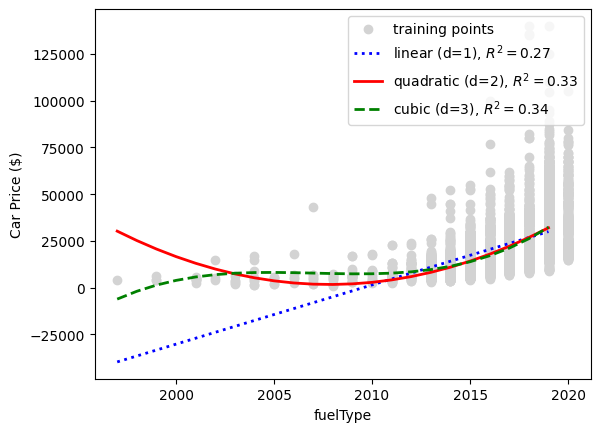

In [355]:
plot_regression('year')

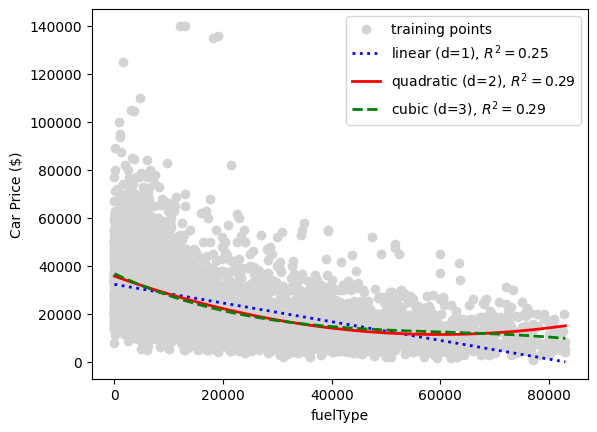

In [356]:
plot_regression('mileage')

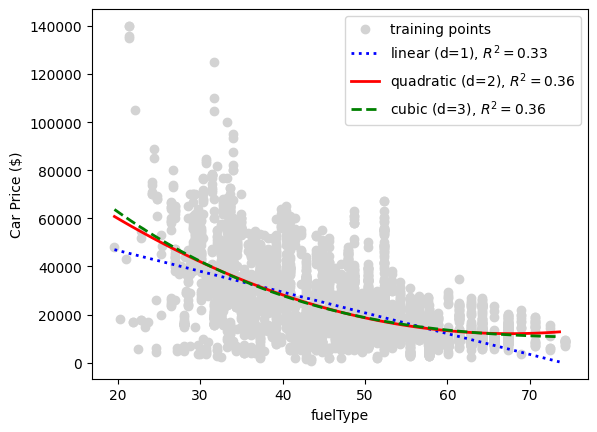

In [357]:
plot_regression('mpg')

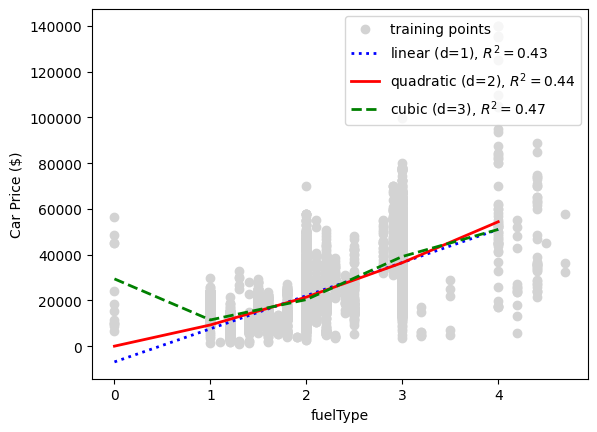

In [358]:
plot_regression('engineSize')

# Polynomial Regression

In [359]:
# 독립변수(X)와 종속변수(y) 설정
X = car_data[['feature1', 'feature2', '...']]  # 사용할 독립변수들을 선택
y = car_data['Price']  # 예측하고자 하는 종속변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다항 특성 추가
degree = 2  # 다항 차수 설정
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 다항 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 훈련 데이터에 대한 예측
y_train_pred = model.predict(X_train_poly)

# 테스트 데이터에 대한 예측
y_test_pred = model.predict(X_test_poly)

# 성능 평가
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training R2 Score: {train_r2:.2f}')
print(f'Test R2 Score: {test_r2:.2f}')
print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Test Mean Squared Error: {test_mse:.2f}')

# 결과 시각화
# 예측 결과와 실제 결과를 비교하는 시각화 코드를 추가합니다.
plt.scatter(X_test['feature1'], y_test, color='black', label='Actual')
plt.scatter(X_test['feature1'], y_test_pred, color='blue', label='Predicted')
plt.xlabel('Feature 1')
plt.ylabel('Price')
plt.legend()
plt.show()


NameError: name 'car_data' is not defined

# Modeling nonlinear relationships in the Car Price Dataset

# Model Complexity and Overfitting

# Using regularized methods for regression

## Ridge

In [ ]:
from sklearn.linear_model import Ridge

# alpha는 정규화 강도를 조절하는 매개변수입니다.
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


Ridge()

## Lasso

In [ ]:
from sklearn.linear_model import Lasso

# alpha는 정규화 강도를 조절하는 매개변수입니다.
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)


/Users/sayyyho/miniconda3/envs/datascience/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.629e+10, tolerance: 1.046e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()